In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
from sklearn.preprocessing import PolynomialFeatures

## Loading datasets
We begin by loading both the Boston and Iris datasets. More information about the Boston dataset can be found [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) and more information about the Iris dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/iris). Do not change the cell below this one.

In [2]:
# Define a random state for reproducibility.
random_state = np.random.RandomState(0)

# Load and shuffle the Boston dataset. Only subsample some features.
boston_X, boston_y = load_boston(return_X_y=True)
permutation = random_state.permutation(boston_X.shape[0])
boston_X = boston_X[permutation][:, [5, 6]]
boston_y = boston_y[permutation]

# Split the dataset into train and test sets.
boston_X_train = boston_X[:-100]
boston_y_train = boston_y[:-100]
boston_X_test = boston_X[-100:]
boston_y_test = boston_y[-100:]

# Create a new featurization for the boston dataset by turning the current
# features into a tenth degree polynomial.
boston_poly_X_train = PolynomialFeatures(8).fit_transform(boston_X_train)
boston_poly_X_test = PolynomialFeatures(8).fit_transform(boston_X_test)

# Now load and shuffle the Iris dataset.
# Discarding all output labels that correspond to a 2.
iris_X, iris_y = load_iris(return_X_y=True)
iris_X = iris_X[:100]
iris_y = iris_y[:100]
permutation = random_state.permutation(iris_X.shape[0])
iris_X = iris_X[permutation]
iris_y = iris_y[permutation]

# Split the dataset into train and test sets.
iris_X_train = iris_X[:-20]
iris_y_train = iris_y[:-20]
iris_X_test = iris_X[-20:]
iris_y_test = iris_y[-20:]

## Regression and Prediction functions
We now define the regression and prediction functions. You need to fill these out, we provide `logistic_cross_entropy_loss_gradient` as an example.

Remember that the squared loss (with regularization) with respect to linear regression is defined as $\|X\beta - y\|_2^2 + \lambda \|\beta\|_2^2$ where $\beta$ is the linear model, $X$ is the feature matrix, $\lambda$ is a regularization term, and $y$ are the true output values. Furthermore remember that the derivative of $\|X\beta - y\|_2^2$ with respect to $\beta$ is $2X^{\top}(X\beta - y)$ and the derivative of $\lambda \|\beta\|_2^2$ is $2\lambda \beta$.

The cross entropy loss with respect to logistic regression is defined as $-\frac{1}{n} \sum_{i=1}^n \left[y_i \log \sigma(x_i^{\top}\beta) + (1 - y_i)\log\sigma(-x_i^{\top}\beta)\right]$.

In [26]:
def regression_predict(X, beta):
    """Given a linear model (aka a vector) and a feature matrix
    predict the output vector.
    
    Parameters
    ----------
    X : numpy array of shape nxd
        The feature matrix where each row corresponds to a single
        feature vector.
    beta : numpy array of shape d
        The linear model.
    
    Returns
    -------
    y : numpy array of shape n
        The predicted output vector.
    """
    # TODO: Fill in (Q2a)
    return X @ beta

def regression_least_squares(X, true_y, lambda_value):
    """Compute the optimal linear model that minimizes the regularized squared loss.

    Parameters
    ----------
    X : numpy array of shape nxd
        The feature matrix where each row corresponds to a single
        feature vector.
    true_y : numpy array of shape n
        The true output vector.
    lambda_value : float
        A non-negative regularization term.
    
    Returns
    -------
    beta : numpy array of shape d
        The optimal linear model.
    """
    # TODO: Fill in (Q2a)
    beta = (X.T @ true_y) @ np.linalg.inv(np.dot(X.T, X) + lambda_value)
    return beta

In [6]:
def sigmoid(x):
    """The sigmoid function."""
    return 1 / (1 + np.exp(-x))

def logistic_predict(X, beta):
    """Given a linear model (aka a vector) and a feature matrix
    predict the probability of the output label being 1 using logistic
    regression.
    
    Parameters
    ----------
    X : numpy array of shape nxd
        The feature matrix where each row corresponds to a single
        feature vector.
    beta : numpy array of shape d
        The linear model.
    
    Returns
    -------
    y : numpy array of shape n
        The predicted output vector.
    """
    # TODO: Fill in (Q2b)
    y = sigmoid(X @ beta)
    return y

def logistic_cross_entropy_loss(X, beta, true_y):
    """Output the cross entropy loss of a given logistic model.
    
    Parameters
    ----------
    X : numpy array of shape nxd
        The feature matrix where each row corresponds to a single
        feature vector.
    beta : numpy array of shape d
        The linear model.
    true_y : numpy array of shape n
        The true output vectors. Consists of 0s and 1s.
        
    Returns
    -------
    loss : float
        The value of the loss.
    """
    # TODO: Fill in (Q2b)
    loss = -np.sum(true_y * np.log(sigmoid(X.T @ beta)) + (1-true_y) * np.log(sigmoid(-X.T @ beta))) / X.shape[0]
    return loss

def logistic_cross_entropy_loss_gradient(X, beta, true_y):
    """Output the gradient of the squared loss evaluated with respect to beta.
    
    Parameters
    ----------
    X : numpy array of shape nxd
        The feature matrix where each row corresponds to a single
        feature vector.
    beta : numpy array of shape d
        The linear model.
    true_y : numpy array of shape n
        The true output vectors.
        
    Returns
    -------
    loss_gradient : numpy array of shape d
        The gradient of the loss evaluated with respect to beta.
    """
    return -np.sum((true_y - sigmoid(X @ beta)) * X.T, axis=1) / X.shape[0]

In [63]:
def gradient_descent(X, init_beta, true_y, loss, loss_gradient,
                     learning_rate, iterations):
    """Performs gradient descent on a given loss function and
    returns the optimized beta.
    
    Parameters
    ----------
    X : numpy array of shape nxd
        The feature matrix where each row corresponds to a single
        feature vector.
    init_beta : numpy array of shape d
        The initial value for the linear model.
    true_y : numpy array of shape n
        The true output vectors.
    loss : function
        The loss function we are optimizing.
    loss_gradient : function
        The gradient function that corresponds to the loss function.
    learning_rate : float
        The learning rate for gradient descent.
    iterations : int
        The number of iterations to optimize the loss for.

    Returns
    -------
    beta : numpy array of shape d
        The optimized beta.
    """
    # TODO: Fill in (Q2c)
#     beta = logistic_predict(X, init_beta)
    beta = init_beta
    for i in range(iterations):
        gradient = loss_gradient(X, beta, true_y)
        beta = beta - (gradient * learning_rate)
    
    return beta

## Training models for the Boston dataset
In the section below you will train a regression model and evaluate it against the RMSE for the Boston housing dataset we created above.

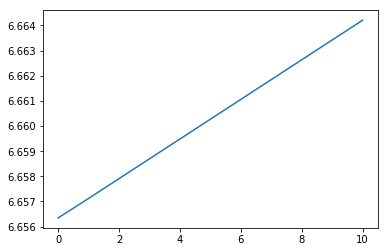

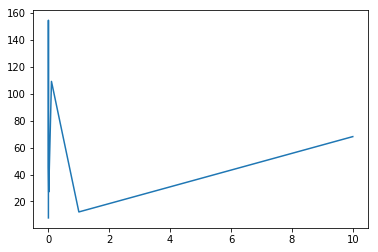

In [51]:
# TODO: Fill in (Q2d)
def rmse(predictions, target):
    return np.sqrt(np.sum(np.power(predictions - target, 2)) / predictions.shape[0])


lambdas = [0, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10]
errors = []
for l in lambdas:
    beta = regression_least_squares(boston_X_train, boston_y_train, l)
    predictions = regression_predict(boston_X_test, beta)
    error = rmse(predictions, boston_y_test)
    errors.append(error)


plt.figure()
plt.plot(lambdas, errors)
plt.show()

errors2 = []
for l in lambdas:
    beta = regression_least_squares(boston_poly_X_train, boston_y_train, l)
    predictions = regression_predict(boston_poly_X_test, beta)
    error = rmse(predictions, boston_y_test)
    errors2.append(error)

plt.figure()
plt.plot(lambdas, errors2)
plt.show()

## Training model for the logistic regression dataset
In this section you will train a logistic model and evaluate it against the MAE for the Iris dataset we created above.

In [76]:
# TODO: Fill in (Q2f)

def indicator(p):
    return 1 if p >= 0.5 else 0

def MAE_helper(y1, y2):
    return 1 if y1 == y2 else 0

def MAE(predictions, targets):
    n = predictions.shape[0]
    return np.sum([MAE_helper(predictions[i], targets[i]) for i in range(n)]) / n

beta = gradient_descent(X=iris_X_train, 
                 init_beta=np.zeros(iris_X_train.shape[1]), 
                 true_y=iris_y_train, 
                 loss=logistic_cross_entropy_loss, 
                 loss_gradient=logistic_cross_entropy_loss_gradient, 
                 learning_rate=0.5, 
                 iterations=1000)

predictions = logistic_predict(iris_X_test, beta)
filtered_predictions = np.empty(predictions.shape[0])
for i in range(predictions.shape[0]):
    filtered_predictions[i] = indicator(pred)

MAE(filtered_predictions, iris_y_test)

0.6